# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [5]:
df=pd.read_csv('./Data/Clean_Data/cleaned_data.csv')
df.head(8)

,age,sex,bmi,weight_category,children,smoker,region,charges,sex_male,smoker_yes,region_encoded
0,19.0,female,3.328627,Overweight,0.0,yes,southwest,9.734176,0.0,1.0,3.0
1,18.0,male,3.519573,Obese,1.0,no,southeast,7.453302,1.0,0.0,2.0
2,28.0,male,3.496508,Obese,3.0,no,southeast,8.400538,1.0,0.0,2.0
3,33.0,male,3.122585,Healthy,0.0,no,northwest,9.998092,1.0,0.0,1.0
4,32.0,male,3.363149,Overweight,0.0,no,northwest,8.260197,1.0,0.0,1.0
5,31.0,female,3.248046,Overweight,0.0,no,southeast,8.231275,0.0,0.0,2.0
6,46.0,female,3.509753,Obese,1.0,no,southeast,9.016827,0.0,0.0,2.0
7,37.0,female,3.322875,Overweight,3.0,no,northwest,8.893093,0.0,0.0,1.0


# Data Visualisation #

**Bivariate Analysis with Categorical Variables**
* Looking at how the categorical data ('Children', 'Smoker', 'Sex') influence insurance charges

Plot 1: Bar plot with matplotlib

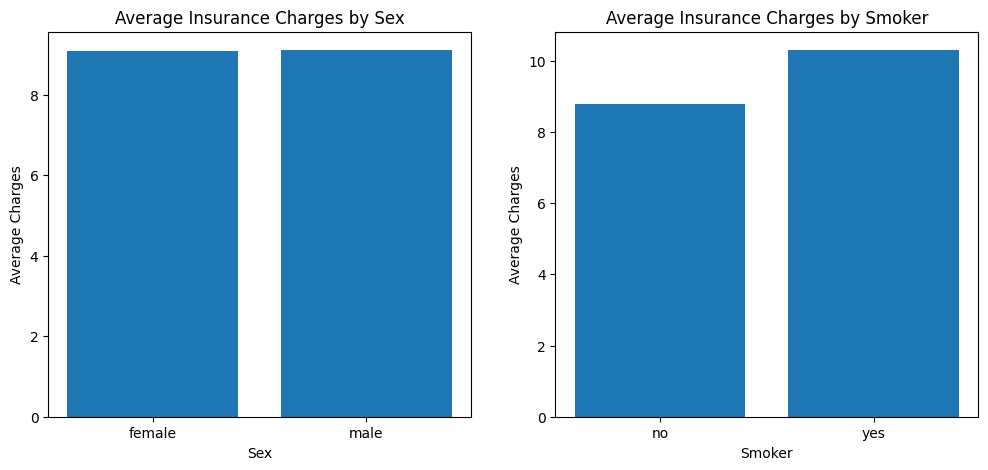

In [7]:
sex_charges = df.groupby('sex')['charges'].mean()
smoker_charges = df.groupby('smoker')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=sex_charges.index, height=sex_charges)
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Sex')

axes[1].bar(x=smoker_charges.index, height=smoker_charges)
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Smoker')

plt.show()

Plot on the left hand side shows that the average insurance charge for males and females is almost identical indicating gender does not significanlty affect insurance charges. Although men and women incur similar average insurance charges overall, I will investigate how gender interacts with other variables to influence costs.


Plot on the right hand side shows that smoking status has  strong mipact with smokers on average incurring higher charges. This supports your hypothesis:

Smokers will incur higher insurance charges across all combinations of demographic and lifestyle variables.

Plot 2: Bar and Scatter plot, matplotlib: Region

Text(0.5, 1.0, 'Average Insurance Charges by Region')

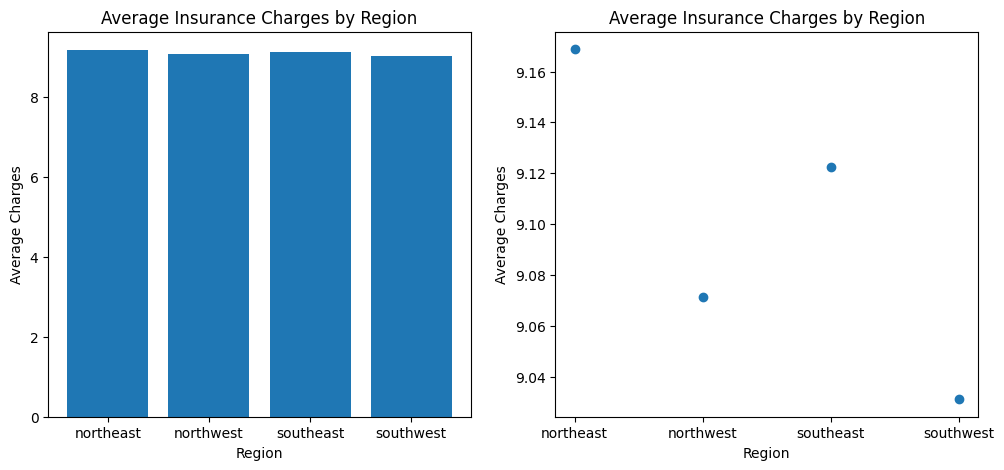

In [ ]:
# As the barplot values are very close a scatter plot can help to visualise the differences better
region_charges = df.groupby('region')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=region_charges.index, height=region_charges)
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Region')

axes[1].scatter(x=region_charges.index, y=region_charges)
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Region')

Region on average has minalimpact on insurance charges. The scatter plot provides a more zoomed in persepctive which shows how close avergae charges per region are.. This suggests that region is not a strong predictor of insurance cost.

Plot 3: Bar and scatter plot, matplotlib: Children

Text(0.5, 1.0, 'Average Insurance Charges by Number of Children')

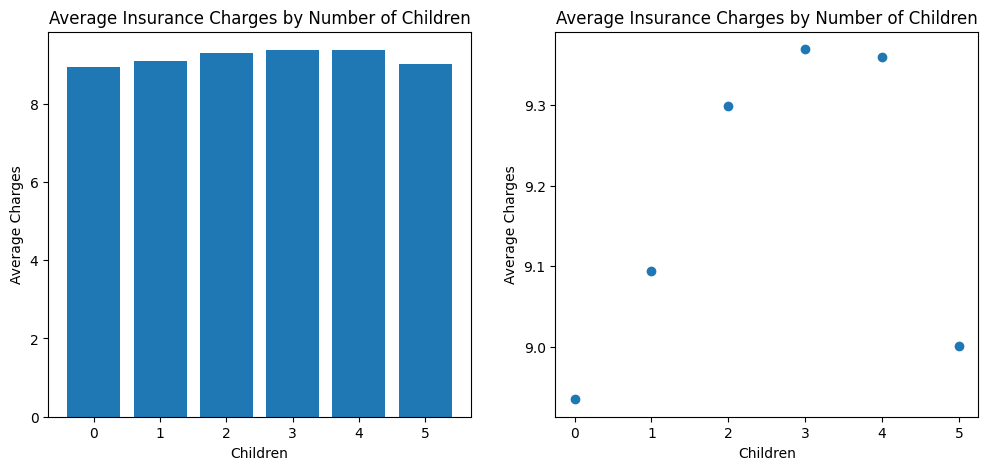

In [ ]:
# As the barplot values are very close a scatter plot can help to visualise the differences better
children_charges_charges = df.groupby('children')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=children_charges_charges.index, height=children_charges_charges)
axes[0].set_xlabel('Children')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Number of Children')

axes[1].scatter(x=children_charges_charges.index, y=children_charges_charges)
axes[1].set_xlabel('Children')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Number of Children')

The plot shows that there is a somewhat proportional relationship between number of children and charges up to a point. charges increases as number of childern increase from 0-3 then the linear relationship falls apart

C:\Users\Lailah\AppData\Local\Temp\ipykernel_43192\949706029.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_category_charges = df.groupby('weight_category')['charges'].mean()


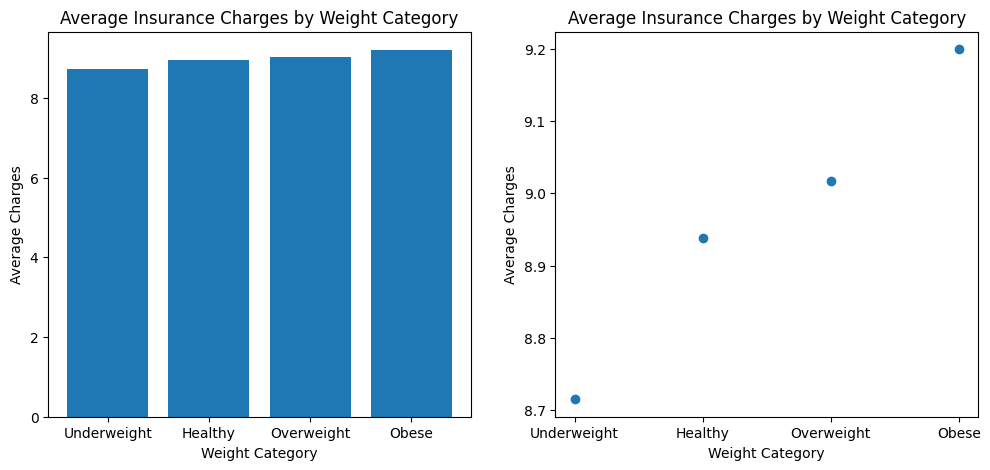

In [10]:
weight_category_charges = df.groupby('weight_category')['charges'].mean()
weight_category_charges_charges = df.groupby('smoker')['charges'].mean()

# Step 1: Define the desired order for the weight categories
desired_order = ['Underweight', 'Healthy', 'Overweight', 'Obese', 'Severely Obese']

# Step 2: Make sure weight_category is treated as a categorical variable with that order
df['weight_category'] = pd.Categorical(df['weight_category'], categories=desired_order, ordered=True)

# Step 3: Reindex to enforce the order (optional if step 2 is done correctly, but safe to include)
weight_category_charges = weight_category_charges.reindex(desired_order)

weight_category_charges = df.groupby('weight_category')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=weight_category_charges.index, height=weight_category_charges)
axes[0].set_xlabel('Weight Category')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Weight Category')

axes[1].scatter(x=weight_category_charges.index, y=weight_category_charges)
axes[1].set_xlabel('Weight Category')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Weight Category')


plt.show()

Charges increase as bmi increase but ver slightly which could indicate a week correlation between the two this will be explored further.

**Bivariate Analysis with Numerical Variables**

* Looking at how the numerical variables ('bmi', 'age') influence insurance charges

**Multivariate Analysis**

**Plot 5: Scatter plot with trendline, Seaborn: Age**

<Figure size 1000x600 with 0 Axes>

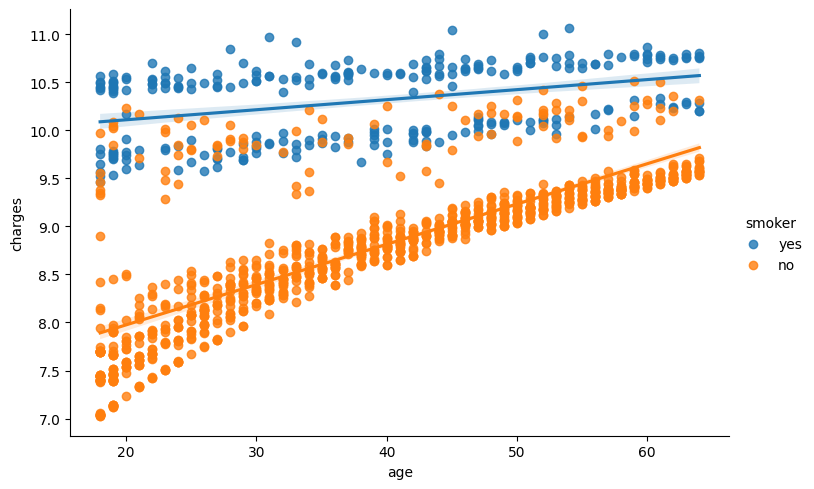

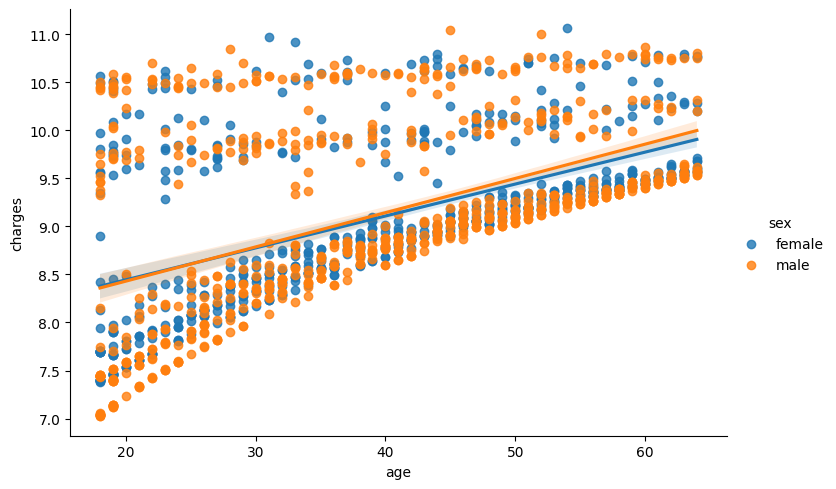

In [11]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x='age', y='charges', hue='smoker', height=5, aspect=1.5)

sns.lmplot(data=df, x='age', y='charges', hue='sex', height=5, aspect=1.5)
plt.show()

The scatter pltos shows a clear positive correlation between age and charges.Smokers consistently pay more than non-smokers at every age. The regression lines show a positive trend for both groups — meaning charges increase with age, regardless of smoking status.

When it comes to genered difference in insurance chargges their is no distinct difference between male and female.Charges increase with age for both males and females, as shown by the upward-sloping regression lines.

The regression lines for male and female are nearly parallel, suggesting that the rate of increase in charges with age is similar for both sexes.

**Plot 6 Scatter plot, Seaborn: bmi**

<Figure size 1000x600 with 0 Axes>

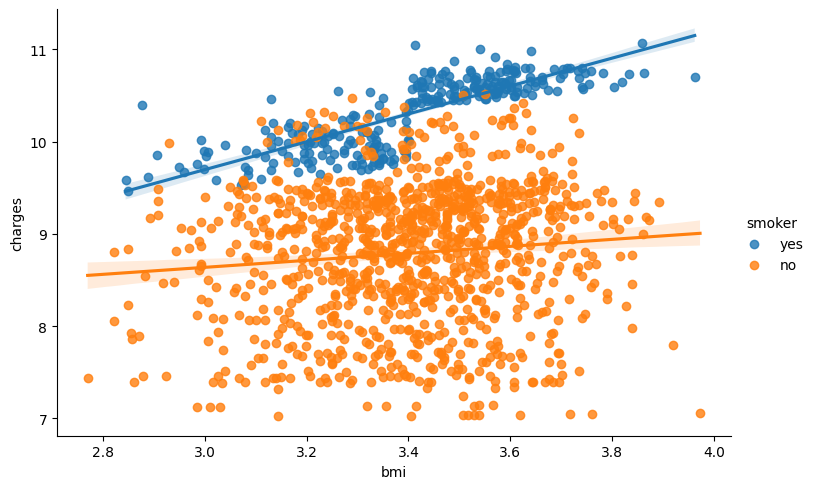

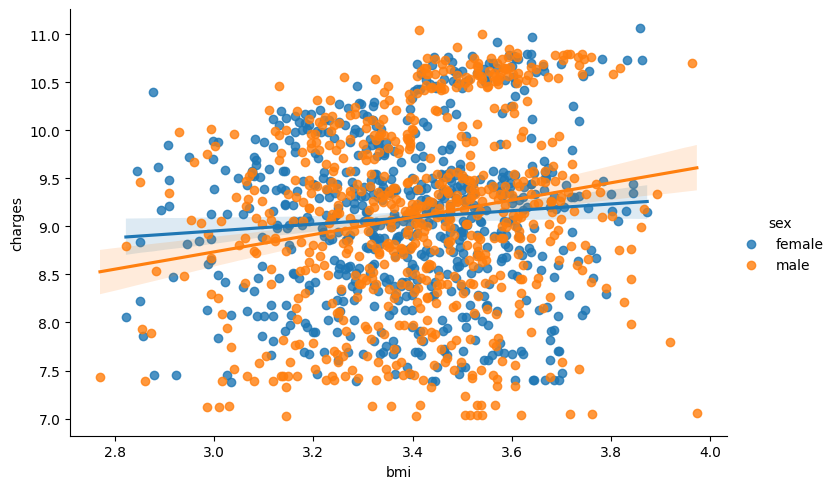

In [12]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker', height=5, aspect=1.5)

sns.lmplot(data=df, x='bmi', y='charges', hue='sex', height=5, aspect=1.5)
plt.show()

The first plot shows that of those who smoke as their bmi increases so do the charges they incurr. Smoking + higher bmi = higher charges.
However for non-smokers their seems to be no correlation between bmi and insurance charges.

The bottom plot again shows no distinct correlation between gender, bmi and charges.

**PLot 7 Pairplot, seaborn**
* This was for a side by side comparison of the scatter plots and KDE plots

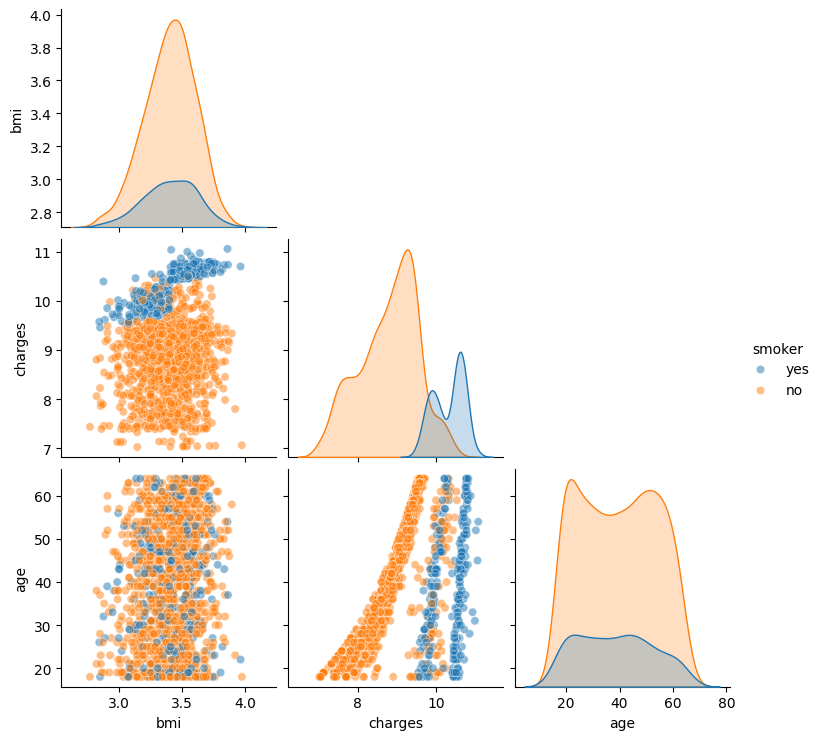

In [14]:
fig=sns.pairplot(data=df[['bmi', 'charges', 'age', 'smoker']], hue='smoker', plot_kws={'alpha': 0.5});
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
    fig.axes[i, j].set_visible(False)
plt.show()

**Plot 8 Heatmap, Seaborn**

In [6]:
df_corr=df[['bmi', 'charges', 'age', 'smoker_yes','sex_male','children']].corr(method='pearson')
df_corr

,bmi,charges,age,smoker_yes,sex_male,children
bmi,1.000000,0.138466,0.116628,-0.025817,-0.021875,0.013015
charges,0.138466,1.000000,0.526234,0.268793,0.011467,0.161360
age,0.116628,0.526234,1.000000,-0.005470,-0.055025,0.042644
smoker_yes,-0.025817,0.268793,-0.005470,1.000000,0.077008,0.013141
sex_male,-0.021875,0.011467,-0.055025,0.077008,1.000000,-0.003825
children,0.013015,0.161360,0.042644,0.013141,-0.003825,1.000000


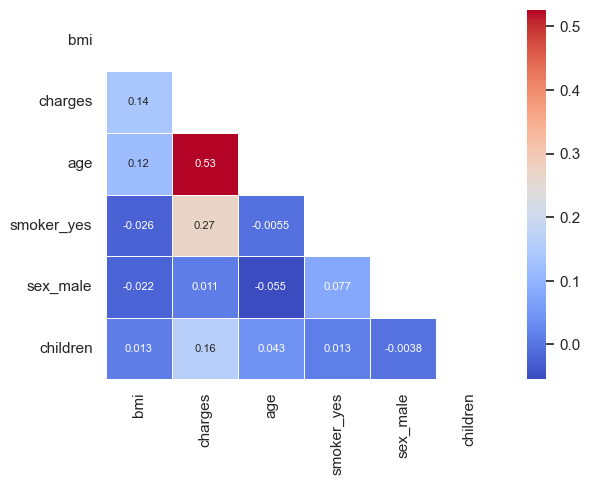

In [7]:
sns.set_theme(style="white")
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.ylim(df_corr.shape[0], 0)
plt.show()

The heatmaps quantifies the observations seen in the previous plots
Age vs Charges: Positive Correlation of 0.53, the strongest in the matrix. Confirms the earlier regression plots showing that age is a strong predictor of insurance charges.

Smoker_yes vs Charges: Positive correlation of 0.27 moderate but meaningful. Supports my scatter plots and pairplots showing that smokers consistently pay more, though the effect is not as strong as age.

BMI vs Charges: Correlation of 0.14, weak but positive.
Matches my BMI scatter plots, where the trend was visible but not steep. Suggests BMI may affect insruance charges but not greatly and suggest it isn’t a strong predictor unless combined with smoking status.

Sex_male vs Charges: Correlation of 0.011 which is essentially zero. Confirms earlier plots showing no meaningful difference in charges between males and females.

Children vs Charges: Weakly positive correlation of 0.16. This suggets that having more children is associated with slighlty higher charges but this is not a strong relationship this weak relationship is also evident in the bar plot of children vs charges

In [19]:
fig = px.box(df, x='sex', y='charges', color='children',title='Charges by Sex and Children')
fig.show()

Putting boxplot results into a dataframe

In [11]:
dict1={
    "Children": ["0","0", "1","1", "2","2", "3","3", "4","4","5", "5"],
    "sex": ["male", "female","male", "female","male", "female","male", "female","male", "female","male", "female"],
    "max_charges": [11.04, 11.063, 10.84, 10.98, 11.00, 10.75, 10.81, 10.76, 9.58, 9.85, 10.51, 10.51],
    "median_charges":[9.23, 9.15, 9.08, 9.02, 9.25, 9.31, 9.05, 9.22, 8.81, 9.08, 9.32, 9.31]

}
dict1_df=pd.DataFrame(dict1)
dict1_df

,Children,sex,max_charges,median_charges
0,0,male,11.040,9.23
1,0,female,11.063,9.15
2,1,male,10.840,9.08
3,1,female,10.980,9.02
4,2,male,11.000,9.25
5,2,female,10.750,9.31
6,3,male,10.810,9.05
7,3,female,10.760,9.22
8,4,male,9.580,8.81
9,4,female,9.850,9.08


In [20]:
fig = px.box(df, x='smoker', y='charges', color='sex',title='Charges by Children')
fig.show()

In [13]:
df_select=df[['age','sex','smoker','charges']]
df_select.head(8)

,age,sex,smoker,charges
0,19.0,female,yes,9.734176
1,18.0,male,no,7.453302
2,28.0,male,no,8.400538
3,33.0,male,no,9.998092
4,32.0,male,no,8.260197
5,31.0,female,no,8.231275
6,46.0,female,no,9.016827
7,37.0,female,no,8.893093


In [14]:

df_sorted_charges = df_select.sort_values(by='charges', ascending=False) #sorting emissions values ascending
df_sorted_charges.head(20)

,age,sex,smoker,charges
543,54.0,female,yes,11.063045
1299,45.0,male,yes,11.044407
1229,52.0,male,yes,11.002456
577,31.0,female,yes,10.977996
818,33.0,female,yes,10.917547
1145,60.0,male,yes,10.870297
34,28.0,male,yes,10.843389
1240,64.0,male,yes,10.811296
1061,59.0,male,yes,10.798968
488,44.0,female,yes,10.797229


The top 20 highest insurance charges are incurred by older smokers, with the highest charges being around 50,000. 
The data indicates a clear trend where smoking status significantly increases insurance charges, especially among older 
individuals.
This along with the barplot of average charges by smoker status highlights the substantial financial impact of smoking 
on insurance costs. It's the only barplot that showed sizeable differences in charges based on the categories compared 
to others.
It can be concluded that one of the biggest impacts on higher insurance charges is smoking status, particularly for older adults.

In [ ]:
df_sorted_charges = df_select.sort_values(by='charges', ascending=False) #sorting emissions values ascending
df_sorted_charges.tail(20)

,age,sex,smoker,charges
374,20.0,male,no,7.238158
722,19.0,male,no,7.141442
385,19.0,male,no,7.140341
136,19.0,male,no,7.140011
513,19.0,male,no,7.135925
487,19.0,male,no,7.134043
790,19.0,male,no,7.132823
583,19.0,male,no,7.125135
680,19.0,male,no,7.124688
1250,19.0,male,no,7.124128


This futher confirms the statement made earlier. This dataframe shows that the lowest 20 insurance charges are for young non-smokers which so happend to be all males.